In [72]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np 
from random import random, seed
import functions as fx

import sklearn.model_selection as sklm

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as skl

from imageio import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd 



# Bias-variance tradeoff for OLS
# Confidence interval for ridge


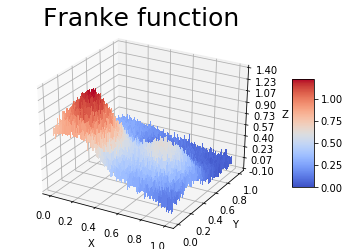

In [73]:
fig         = plt.figure() 
ax          = fig.gca(projection='3d')
n_x         = 200

# Make data. 
x           = np.linspace(0, 1, n_x)
y           = np.linspace(0, 1, n_x)


x_mesh, y_mesh  = np.meshgrid(x,y)
noise_level     = 0.05
frank           = fx.FrankeFunction(x_mesh, y_mesh, noise_level)


# Plot the surface. 
surf        = ax.plot_surface(x_mesh, y_mesh, frank, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Franke function', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


# Oppgave A 
standard ols.
confidence intervals for beta by computing their variances.
evaluate MSE and R2.

In [74]:
maxpower = 5

# preallocating variables
beta_ols       = {}
pred_ols       = {}
confidence_ols = {}
mse_ols        = np.empty([maxpower])
r2_ols         = np.empty([maxpower])
mse_ols_scikit = np.empty([maxpower])
r2_ols_scikit  = np.empty([maxpower])

# Running loop over model complexity (polynomial degree) 
for i in range(maxpower):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,i+1)  
    beta_ols ['poly{0}'.format(i+1)], pred_ols ['poly{0}'.format(i+1)]\
                = fx.OridinaryLeastSquares(design,np.ravel(frank),design) 
    
    mse_ols[i]        = fx.MSE(np.ravel(frank),pred_ols['poly'+str(i+1)])
    r2_ols[i]         = fx.R2Score(np.ravel(frank),pred_ols['poly'+str(i+1)])
    mse_ols_scikit[i] = mean_squared_error(np.ravel(frank),pred_ols['poly'+str(i+1)])
    r2_ols_scikit[i]  = r2_score(np.ravel(frank),pred_ols['poly'+str(i+1)])
    
    confidence_ols ['conf{0}'.format(i+1)]= fx.confidence_interval(design,noise_level,0.95)
    print((i+1)*100/maxpower, '% completed')
    

20.0 % completed
40.0 % completed
60.0 % completed
80.0 % completed
100.0 % completed


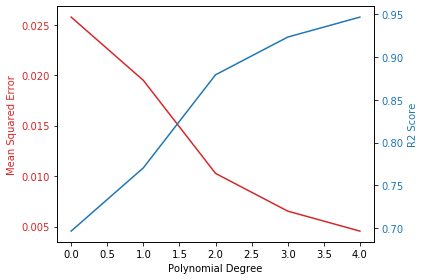

In [75]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(maxpower), mse_ols, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(maxpower), r2_ols, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

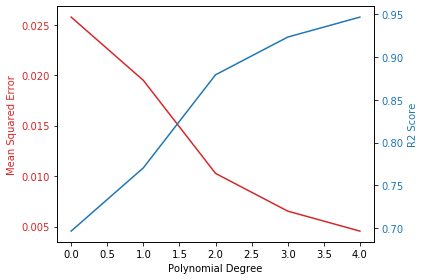

In [76]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(maxpower), mse_ols_scikit, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(maxpower), r2_ols_scikit, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

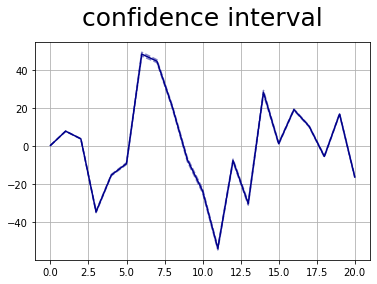

In [77]:

power =5

plt.plot(beta_ols['poly'+str(power)] - confidence_ols['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ols['poly'+str(power)] + confidence_ols['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ols['poly'+str(power)], c='darkblue')
plt.title('confidence interval', fontsize=25, y=1.05)
plt.grid()
plt.show()


# oppgave B

In [80]:


design      = fx.DesignDesign(x,y,5)  
design_train, design_test, y_train, y_test = train_test_split(design, np.ravel(frank), test_size=0.2)

# matrix inversion to find beta
beta = np.linalg.inv(design_train.T.dot(design_train)).dot(design_train.T).dot(y_train)


# and then make the prediction

prediction = design_test @ beta

import numpy as np
from sklearn.linear_model import LinearRegression
prediction_scikit = LinearRegression().fit(design_train, y_train).predict(design_test)


print("Test R2")
print(fx.R2Score(y_test,prediction))
print("Test R2- Scikit Learn")
print(r2_score(y_test,prediction_scikit)) 

# Tester med Scikit Learn



print("Test MSE")
print(fx.MSE(y_test,prediction))          
print("Test MSE- Scikit Learn")
print(mean_squared_error(y_test,prediction_scikit))

Test R2
0.9464574034421269
Test R2- Scikit Learn
0.9464574034421286
Test MSE
0.0044897680459440184
Test MSE- Scikit Learn
0.004489768045943881


In [38]:
maxpower = 5
r2_out   = np.zeros(maxpower)
r2_in    = np.zeros(maxpower)
mse_out  = np.zeros(maxpower)
mse_in   = np.zeros(maxpower)
bias     = np.zeros(maxpower)
variance = np.zeros(maxpower)

r2_out_sci   = np.zeros(maxpower)
r2_in_sci    = np.zeros(maxpower)
mse_out_sci  = np.zeros(maxpower)
mse_in_sci   = np.zeros(maxpower)
bias_sci     = np.zeros(maxpower)
variance_sci = np.zeros(maxpower)

for i in range(maxpower):
    
    design_matrix   = fx.DesignDesign(x,y,i+1)
    r2_out[i], mse_out[i], r2_in[i], mse_in[i], bias[i], variance[i] \
                    = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.OridinaryLeastSquares, shuffle=True)
    r2_out_sci[i], mse_out_sci[i], r2_in_sci[i], mse_in_sci[i], bias_sci[i], variance_sci[i] \
                    = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.OridinaryLeastSquares, shuffle=True, scikit=True)
    
    print((i+1)*100/maxpower, '% completed')


20.0 % completed
40.0 % completed
60.0 % completed
80.0 % completed
100.0 % completed


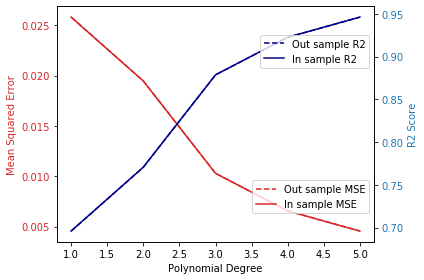

In [39]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(1,maxpower+1), mse_out, color=color,linestyle='--', label='Out sample MSE')
ax1.plot(range(1,maxpower+1), mse_in, color=color, label='In sample MSE')
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.1))
ax1.tick_params(axis='y', labelcolor=color)
#ax1.set_ylim(0.00, 0.02) 
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_out, c='darkblue',linestyle='--', label='Out sample R2')
ax2.plot(range(1,maxpower+1), r2_in,  c='darkblue', label='In sample R2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
#ax2.set_ylim(0.64, 1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



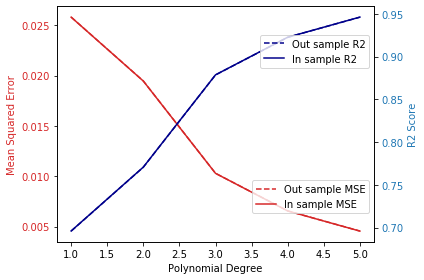

In [40]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(1,maxpower+1), mse_out_sci, color=color,linestyle='--', label='Out sample MSE')
ax1.plot(range(1,maxpower+1), mse_in_sci, color=color, label='In sample MSE')
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.1))
ax1.tick_params(axis='y', labelcolor=color)
#ax1.set_ylim(0.00, 0.02)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_out_sci, c='darkblue',linestyle='--', label='Out sample R2')
ax2.plot(range(1,maxpower+1), r2_in_sci,  c='darkblue', label='In sample R2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
#ax2.set_ylim(0.6, 1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


# Oppgave C

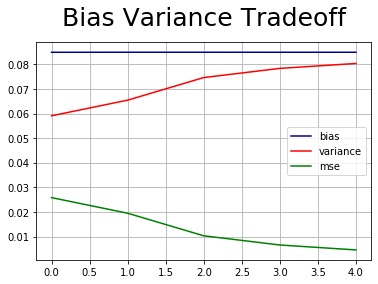

In [42]:
plt.plot(bias, c='darkblue', label='bias')
plt.plot(variance, c='red', label='variance')
plt.plot(mse_out, c='green', label='mse')
plt.legend()
plt.title('Bias Variance Tradeoff', fontsize=25, y=1.05)
plt.grid()
plt.show()


# Comments to plot

Variansen øker med modellkompleksitet, dette er feil.
Varians skal være høyere med økende polynom. 


# Oppgave D - Ridge Regression

In [136]:


# preallocating variables
beta_ridge       = {}
pred_ridge       = {}
confidence_ridge = {}
mse_ridge        = np.empty([maxpower])
r2_ridge         = np.empty([maxpower])
mse_ridge_scikit = np.empty([maxpower])
r2_ridge_scikit  = np.empty([maxpower])



# Running loop over model complexity (polynomial degree) 
for i in range(maxpower):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,i+1)  
    beta_ridge ['poly{0}'.format(i+1)], pred_ridge ['poly{0}'.format(i+1)]\
                = fx.RidgeRegression(design,np.ravel(frank),design, _lambda= 10e-00) 
    
    mse_ridge[i]        = fx.MSE(np.ravel(frank),pred_ridge['poly'+str(i+1)])
    r2_ridge[i]         = fx.R2Score(np.ravel(frank),pred_ridge['poly'+str(i+1)])
    mse_ridge_scikit[i] = mean_squared_error(np.ravel(frank),pred_ridge['poly'+str(i+1)])
    r2_ridge_scikit[i]  = r2_score(np.ravel(frank),pred_ridge['poly'+str(i+1)])
    
    confidence_ridge ['conf{0}'.format(i+1)]= fx.confidence_interval(design,noise_level,0.95,_lambda= 10e-04)
    print((i+1)*100/maxpower, '% completed')

20.0 % completed
40.0 % completed
60.0 % completed
80.0 % completed
100.0 % completed


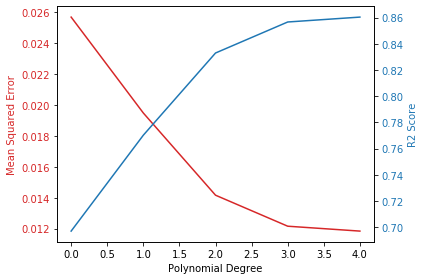

In [137]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(maxpower), mse_ridge, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(maxpower), r2_ridge, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

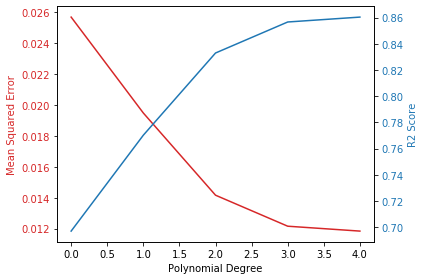

In [138]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(maxpower), mse_ridge_scikit, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(maxpower), r2_ridge_scikit, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

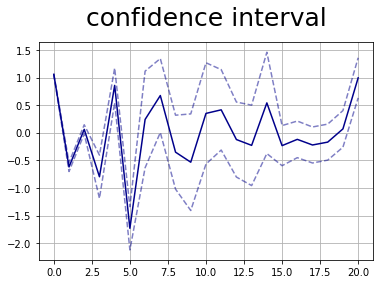

In [139]:

power =5

plt.plot(beta_ridge['poly'+str(power)] - confidence_ridge['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ridge['poly'+str(power)] + confidence_ridge['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ridge['poly'+str(power)], c='darkblue')
plt.title('confidence interval', fontsize=25, y=1.05)
plt.grid()
plt.show()


In [96]:
power=5
lambdas=np.logspace(-4,2,7)


beta_ridge       = {}
pred_ridge       = {}
confidence_ridge = {}
mse_ridge        = np.empty([lambdas.shape[0]])
r2_ridge         = np.empty([lambdas.shape[0]])
mse_ridge_scikit = np.empty([lambdas.shape[0]])
r2_ridge_scikit  = np.empty([lambdas.shape[0]])


# Running loop over model complexity (polynomial degree) 
for i in range(lambdas.shape[0]):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,power)  
    beta_ridge ['lamb{0}'.format(i+1)], pred_ridge ['lamb{0}'.format(i+1)]\
                = fx.RidgeRegression(design,np.ravel(frank),design, _lambda= lambdas[i]) 
    
    mse_ridge[i]        = fx.MSE(np.ravel(frank),pred_ridge['lamb'+str(i+1)])
    r2_ridge[i]         = fx.R2Score(np.ravel(frank),pred_ridge['lamb'+str(i+1)])
    mse_ridge_scikit[i] = mean_squared_error(np.ravel(frank),pred_ridge['lamb'+str(i+1)])
    r2_ridge_scikit[i]  = r2_score(np.ravel(frank),pred_ridge['lamb'+str(i+1)])
    
    confidence_ridge ['conf{0}'.format(i+1)]= fx.confidence_interval(design,noise_level,0.95,_lambda= 10e-04)
    print((i+1)*100/lambdas.shape[0], '% completed')
    

14.285714285714286 % completed
28.571428571428573 % completed
42.857142857142854 % completed
57.142857142857146 % completed
71.42857142857143 % completed
85.71428571428571 % completed
100.0 % completed


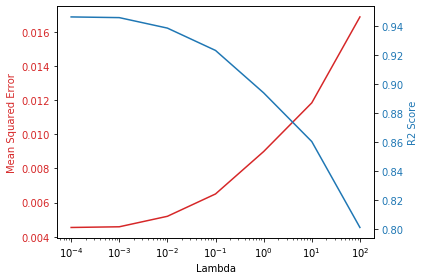

In [102]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(lambdas, mse_ridge, color=color)
plt.xscale('log')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(lambdas, r2_ridge, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.xscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [105]:
design      = fx.DesignDesign(x,y,5)  
design_train, design_test, y_train, y_test = train_test_split(design, np.ravel(frank), test_size=0.2)

# matrix inversion to find beta
beta, prediction = fx.RidgeRegression(design_train, y_train, design_test, _lambda=10e-02)





print("Test R2")
print(fx.R2Score(y_test,prediction))
print("Test R2- Scikit Learn")
print(r2_score(y_test,prediction)) 

# Tester med Scikit Learn



print("Test MSE")
print(fx.MSE(y_test,prediction))          
print("Test MSE- Scikit Learn")
print(mean_squared_error(y_test,prediction))

Test R2
0.9190526451270179
Test R2- Scikit Learn
0.9190526451270179
Test MSE
0.0066980438286912015
Test MSE- Scikit Learn
0.0066980438286912015


In [134]:
maxpower = 5
lambdas=np.logspace(-4,2,7)

r2_out_ridge   = np.zeros([maxpower,lambdas.shape[0]])
r2_in_ridge    = np.zeros([maxpower,lambdas.shape[0]])
mse_out_ridge  = np.zeros([maxpower,lambdas.shape[0]])
mse_in_ridge   = np.zeros([maxpower,lambdas.shape[0]])
bias_ridge     = np.zeros([maxpower,lambdas.shape[0]])
variance_ridge = np.zeros([maxpower,lambdas.shape[0]])

r2_out_sci_ridge   = np.zeros([maxpower,lambdas.shape[0]])
r2_in_sci_ridge    = np.zeros([maxpower,lambdas.shape[0]])
mse_out_sci_ridge  = np.zeros([maxpower,lambdas.shape[0]])
mse_in_sci_ridge   = np.zeros([maxpower,lambdas.shape[0]])
bias_sci_ridge     = np.zeros([maxpower,lambdas.shape[0]])
variance_sci_ridge = np.zeros([maxpower,lambdas.shape[0]])
tmp=0
for i in range(maxpower):
    for j in range(lambdas.shape[0]):
        
        design_matrix   = fx.DesignDesign(x,y,i+1)
        r2_out_ridge[i,j], mse_out_ridge[i,j], r2_in_ridge[i,j], mse_in_ridge[i,j], bias_ridge[i,j], variance_ridge[i,j] \
                        = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.RidgeRegression, _lambda=lambdas[j], shuffle=True)
        r2_out_sci_ridge[i,j], mse_out_sci_ridge[i,j], r2_in_sci_ridge[i,j], mse_in_sci_ridge[i,j], bias_sci_ridge[i,j], variance_sci_ridge[i,j] \
                        = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.RidgeRegression, _lambda=lambdas[j], shuffle=True, scikit=True)
        tmp=tmp+1
        print((tmp)*100/(maxpower*lambdas.shape[0]), '% completed')


2.857142857142857 % completed
5.714285714285714 % completed
8.571428571428571 % completed
11.428571428571429 % completed
14.285714285714286 % completed
17.142857142857142 % completed
20.0 % completed
22.857142857142858 % completed
25.714285714285715 % completed
28.571428571428573 % completed
31.428571428571427 % completed
34.285714285714285 % completed
37.142857142857146 % completed
40.0 % completed
42.857142857142854 % completed
45.714285714285715 % completed
48.57142857142857 % completed
51.42857142857143 % completed
54.285714285714285 % completed
57.142857142857146 % completed
60.0 % completed
62.857142857142854 % completed
65.71428571428571 % completed
68.57142857142857 % completed
71.42857142857143 % completed
74.28571428571429 % completed
77.14285714285714 % completed
80.0 % completed
82.85714285714286 % completed
85.71428571428571 % completed
88.57142857142857 % completed
91.42857142857143 % completed
94.28571428571429 % completed
97.14285714285714 % completed
100.0 % completed


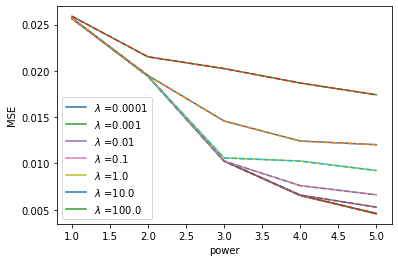

In [132]:
for i in range(np.shape(lambdas)[0]):
    plt.plot(range(1,maxpower+1),mse_out_ridge[:,i], label='$\lambda$ ='+str(lambdas[i]))
    plt.plot(range(1,maxpower+1),mse_in_ridge[:,i], linestyle='--')
    
plt.legend()
plt.xlabel('power')
plt.ylabel('MSE')
plt.show()

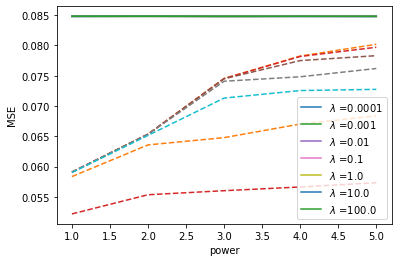

In [135]:
for i in range(np.shape(lambdas)[0]):
    plt.plot(range(1,maxpower+1),bias_ridge[:,i], label='$\lambda$ ='+str(lambdas[i]))
    plt.plot(range(1,maxpower+1),variance_ridge[:,i], linestyle='--')
    
plt.legend()
plt.xlabel('power')
plt.ylabel('MSE')
plt.show()

# Oppgave E - LASSO

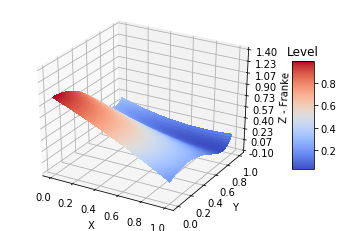

MSE
0.015330167696403316
R2
0.8191938362992663
MSE- Scikit Learn
0.01533016769640332
R2- Scikit Learn
0.6950119312270476


In [162]:


# 1) Lasso regression with Sklearn

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.linear_model as skl

shape=[n_x,n_x]
x_lasso = np.ravel(x_mesh)
y_lasso = np.ravel(y_mesh)
z_lasso = np.ravel(frank)

lasso_multi = np.c_[x_lasso, y_lasso]

# Bruker sklearn for å finne Lasso-modell. Bruker PolynomialFeatures for ikke lineær funksjon
poly2 = PolynomialFeatures(degree=10)

# Transformerer variabelmatrisen 
Lasso_sklearn = poly2.fit_transform(lasso_multi)

# Beregner Lasso modell 
lasso = linear_model.Lasso(alpha=0.001)
fit_lasso = lasso.fit(Lasso_sklearn, z_lasso) 

# beregner forventet z-verdier av x og y verdier
predictLasso = lasso.predict(Lasso_sklearn)


# Plotter forventet overflate med Lasso modellen 
predict_mesh_Lasso = predictLasso.reshape(shape) # for å få den i samme dimensjon som x og y. 

fig = plt.figure()
ax = fig.gca(projection='3d')   
   
surf = ax.plot_surface(x_mesh, y_mesh, predict_mesh_Lasso, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z - Franke')
    
# Add a color bar which maps values to colors.
clb = fig.colorbar(surf, shrink=0.5, aspect=5)
clb.ax.set_title('Level')

plt.show()


print("MSE")
print(fx.MSE(frank,predict_mesh_Lasso))
print("R2")
print(fx.R2Score(frank,predict_mesh_Lasso))
        

print("MSE- Scikit Learn")
print(mean_squared_error(frank,predict_mesh_Lasso))
print("R2- Scikit Learn")
print(r2_score(frank,predict_mesh_Lasso))



In [ ]:
maxpower = 5
r2_out   = np.zeros(maxpower)
r2_in    = np.zeros(maxpower)
mse_out  = np.zeros(maxpower)
mse_in   = np.zeros(maxpower)
bias     = np.zeros(maxpower)
variance = np.zeros(maxpower)

r2_out_sci   = np.zeros(maxpower)
r2_in_sci    = np.zeros(maxpower)
mse_out_sci  = np.zeros(maxpower)
mse_in_sci   = np.zeros(maxpower)
bias_sci     = np.zeros(maxpower)
variance_sci = np.zeros(maxpower)

for i in range(maxpower):
    
    design_matrix   = fx.DesignDesign(x,y,i+1)
    r2_out[i], mse_out[i], r2_in[i], mse_in[i], bias[i], variance[i] \
                    = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.OridinaryLeastSquares, shuffle=True)
    r2_out_sci[i], mse_out_sci[i], r2_in_sci[i], mse_in_sci[i], bias_sci[i], variance_sci[i] \
                    = fx.k_fold_cv(7, np.ravel(frank), design_matrix, fx.OridinaryLeastSquares, shuffle=True, scikit=True)
    
    print((i+1)*100/maxpower, '% completed')


In [166]:

#scipy.misc.imread

# Laster opp terrengdata

terrain1 = imread('SRTM_data_Norway_1.tif')
[n,m] = terrain1.shape



[[1161 1165 1169 ...  931  922  922]
 [1168 1171 1174 ...  941  928  922]
 [1172 1173 1176 ...  945  934  924]
 ...
 [ 673  677  681 ...  300  300  297]
 [ 675  677  681 ...  296  297  294]
 [ 677  680  682 ...  292  294  292]]


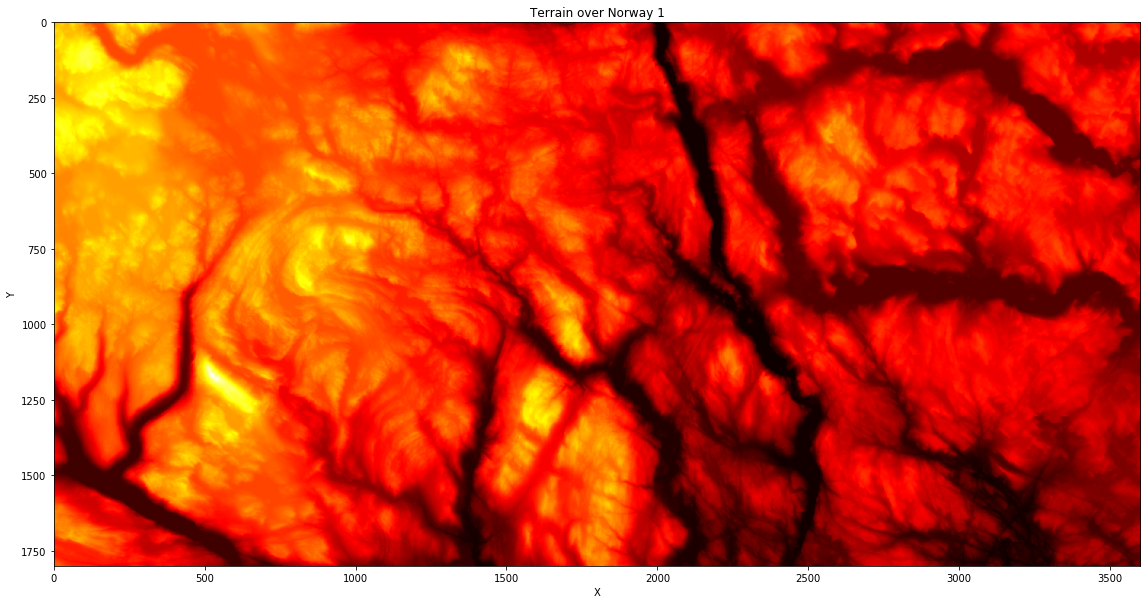

In [173]:
# Plotter terrengdata

print(terrain1)

fig, ax = plt.subplots(figsize=(40,10))
plt.title('Terrain over Norway 1')
plt.imshow(terrain1.T, cmap='hot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [174]:


# Utfører OLS på hele datasettet


def predict(rows, cols, beta_ols):
    out = np.zeros((np.size(rows), np.size(cols)))

    for i,y_ in enumerate(rows):
        for j,x_ in enumerate(cols):
            data_vec = np.array([1, x_, y_, x_**2, x_*y_, y_**2, \
                                x_**3, x_**2*y_, x_*y_**2, y_**3, \
                                x_**4, x_**3*y_, x_**2*y_**2, x_*y_**3,y_**4, \
                                x_**5, x_**4*y_, x_**3*y_**2, x_**2*y_**3,x_*y_**4,y_**5])
            out[i,j] = data_vec @ beta_ols

    return out


rows = np.linspace(0,1,n)
cols = np.linspace(0,1,m)

[C,R] = np.meshgrid(cols,rows)

x = C.reshape(-1,1)
y = R.reshape(-1,1)

num_data = n*m

data = np.c_[np.ones((num_data,1)), x, y, \
                 x**2, x*y, y**2, \
                 x**3, x**2*y, x*y**2, y**3, \
                 x**4, x**3*y, x**2*y**2, x*y**3,y**4, \
                 x**5, x**4*y, x**3*y**2, x**2*y**3,x*y**4, y**5]

z = terrain1.flatten()
    
beta_ols = np.linalg.inv(data.T @ data) @ data.T @ z

fitted_terrain = predict(rows, cols, beta_ols)



mse = np.sum( (fitted_terrain - terrain1)**2 )/num_data
R2 = 1 - np.sum( (fitted_terrain - terrain1)**2 )/np.sum( (terrain1- np.mean(terrain1))**2 )
var = np.sum( (fitted_terrain - np.mean(fitted_terrain))**2 )/num_data
bias = np.sum( (terrain1 - np.mean(fitted_terrain))**2 )/num_data

print("mse: %g\nR2: %g"%(mse, R2))
print("variance: %g"%var)
print("bias: %g\n"%bias)

mse: 42617.3
R2: 0.537315
variance: 49491.5
bias: 92108.8



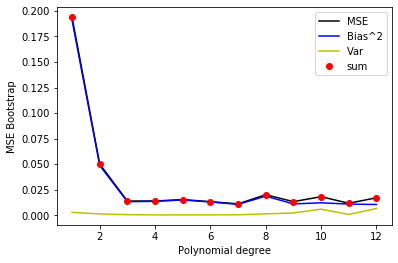

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score#,metrics.explained_variance_score
import sklearn.linear_model as skl
import scipy.linalg as scl
from sklearn.pipeline import Pipeline
from sklearn import model_selection

# The function we fit
def true_fun(X):
    return np.cos(1.5 * np.pi * X)



#Bootstrap part and initializations 
np.random.seed(2018)
err = []
bi=[]
vari=[]

n = 200
n_boostraps = 1000

noise=0.1
x = np.sort(np.random.uniform(0,1,n)).reshape(-1,1)
y = true_fun(x).reshape(-1,1) + np.random.randn(len(x)).reshape(-1,1) * noise
y_no_noise= true_fun(x)

#Polynomial degree
degrees = np.arange(1,16)


#Bootstrap part
for degree in degrees:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        # Evaluate the new model on the same test data each time.
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()
    error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    err.append(error)
    bi.append(bias)
    vari.append(variance)

max_pd = 12 #max polynomial degree to plot to
plt.figure()
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE Bootstrap')
plt.legend()
plt.show()


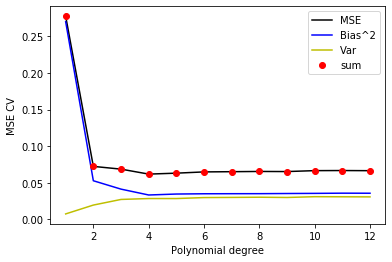

In [68]:


# Cross-validation using Scikit-Learn's KFold function
#initiate stuff again in case data was changed earlier
np.random.seed(2018)

noise=0.1
N=1000
k=5
x = np.sort(np.random.uniform(0,1,n)).reshape(-1,1)
y = true_fun(x).reshape(-1,1) + np.random.randn(len(x)).reshape(-1,1) * noise
y_no_noise= true_fun(x)

degrees = np.arange(1,16)

kfold = KFold(n_splits = k,shuffle=True,random_state=5)

#Two clumsy lines to get the size of y_pred array right
X_trainz, X_testz, y_trainz, y_testz = train_test_split(x,y,test_size=1./k)
array_size_thingy=len(y_testz)


err = []
bi=[]
vari=[]

for deg in degrees:
    y_pred = np.empty((array_size_thingy, k))
    j=0
    model = make_pipeline(PolynomialFeatures(degree=deg),LinearRegression(fit_intercept=False))
    for train_inds,test_inds in kfold.split(x):
        xtrain = x[train_inds]
        ytrain= y[train_inds]
        xtest = x[test_inds]
        ytest = y[test_inds]
        y_pred[:,j] = model.fit(xtrain,ytrain).predict(xtest).ravel()
        j+=1
        
        
    error = np.mean( np.mean((ytest - y_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (ytest - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    err.append(error)
    bi.append(bias)
    vari.append(variance)

max_pd = 12 #max polynomial degree to plot to
plt.figure()
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE CV')
plt.legend()
plt.show()


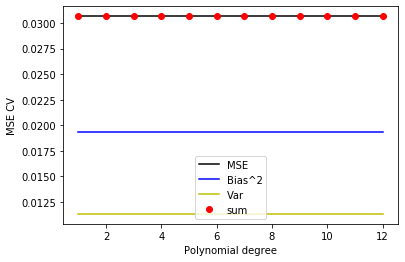

In [70]:


# Cross-validation using Scikit-Learn's KFold function
#initiate stuff again in case data was changed earlier
np.random.seed(2018)

noise=0.1
N=1000
n=1000
k=5
x = np.sort(np.random.uniform(0,1,n)).reshape(-1,1)
y = true_fun(x).reshape(-1,1) + np.random.randn(len(x)).reshape(-1,1) * noise
y_no_noise= true_fun(x)

degrees = np.arange(1,16)

kfold = KFold(n_splits = k,shuffle=True,random_state=5)

#Two clumsy lines to get the size of y_pred array right
X_trainz, X_testz, y_trainz, y_testz = train_test_split(x,y,test_size=1./k)
array_size_thingy=len(y_testz)
x           = np.linspace(0, 1, 1000)

err = []
bi=[]
vari=[]

for deg in degrees:
    y_pred = np.empty((array_size_thingy, k))
    j=0
    #model = make_pipeline(PolynomialFeatures(degree=deg),LinearRegression(fit_intercept=False))
    model   = design_1d(x,i+1)
    for train_inds,test_inds in kfold.split(x):
        xtrain = model[train_inds,:]
        ytrain= y[train_inds]
        xtest = model[test_inds,:]
        ytest = y[test_inds]
        #y_pred[:,j] = model.fit(xtrain,ytrain).predict(xtest).ravel()
        a, y_p=fx.RidgeRegression(xtrain,ytrain,xtest,_lambda=10e-05)
        y_pred[:,j]=y_p.ravel()
        j+=1
        
        
    error = np.mean( np.mean((ytest - y_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (ytest - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    err.append(error)
    bi.append(bias)
    vari.append(variance)

max_pd = 12 #max polynomial degree to plot to
plt.figure()
plt.plot(degrees[:max_pd],err[:max_pd],'k',label='MSE')
plt.plot(degrees[:max_pd],bi[:max_pd],'b',label='Bias^2')
plt.plot(degrees[:max_pd],vari[:max_pd],'y',label='Var')
summ=np.zeros(len(vari))
for i in range(len(err)):
    summ[i]=vari[i]+bi[i]
plt.plot(degrees[:max_pd],summ[:max_pd],'ro',label='sum')

plt.xlabel('Polynomial degree')
plt.ylabel('MSE CV')
plt.legend()
plt.show()


In [49]:


def design_1d(x,degree):
    design=np.empty([len(x),degree])
    for i in range(degree):
        design[:,i]=x**i
    return design
x           = np.linspace(0, 1, 1000)


In [50]:
def k_fold_cv(k, indata, indesign, predictor, _lambda=0, shuffle=False):
    mask = np.arange(indata.shape[0])
    if shuffle:
        np.random.shuffle(mask)
    data = fx.reshaper(k, indata[mask])
    design = fx.reshaper(k, indesign[mask])
    
    r2_out = 0
    r2_in = 0
    mse_out = 0
    mse_in = 0
    bias = 0
    variance = 0
    prediction = np.empty((np.shape(data[1])[0], k))
    for i in range(k):
        train_design = design[np.arange(len(design))!=i]      # Featch all but the i-th element
        train_design = np.concatenate(train_design,axis=0)
        train_data   = data[np.arange(len(data))!=i]
        train_data   = np.concatenate(train_data,axis=0)
        test_design  = design[i]
        test_data    = data[i]


        
        
        if _lambda != 0:
            beta, pred = predictor(train_design, train_data, test_design, _lambda)
        else:
            beta, pred = (predictor(train_design, train_data, test_design))
            
        prediction[:,i]=pred.ravel() 
    
#error = np.mean( np.mean((ytest - y_pred)**2, axis=1, keepdims=True) )
#bias = np.mean( (ytest - np.mean(y_pred, axis=1, keepdims=True))**2 )
#variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )        
        #r2_out += R2Score(test_data, pred)
        #r2_in +=R2Score(train_data,train_design @ beta)
        #mse_out += MSE(test_data, pred)
        #mse_in += MSE(train_data,train_design @ beta)
    error = np.mean( np.mean((test_data - pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (test_data - np.mean(pred, axis=1, keepdims=True))**2 )
    #variance = np.mean( np.var(prediction, axis=1, keepdims=True) )
    variance = np.mean( np.var(prediction, axis=1, keepdims=True ))
    #np.mean((pred-np.mean(pred))**2)
    #bias += np.mean((test_data-np.mean(pred))**2)
    #variance += np.mean((pred-np.mean(pred))**2)
    #r2_out/k, mse_out/k, r2_in/k, mse_in/k, bias/k, variance/k

    return error, bias, variance



In [56]:
maxpower=15
r2_out   = np.zeros(maxpower)
r2_in    = np.zeros(maxpower)
mse_out  = np.zeros(maxpower)
mse_in   = np.zeros(maxpower)
bias     = np.zeros(maxpower)
variance = np.zeros(maxpower)

r2_out_sci   = np.zeros(maxpower)
r2_in_sci    = np.zeros(maxpower)
mse_out_sci  = np.zeros(maxpower)
mse_in_sci   = np.zeros(maxpower)
bias_sci     = np.zeros(maxpower)
variance_sci = np.zeros(maxpower)


for i in range(maxpower):
    
    design_matrix   = design_1d(x,i+1)
    mse_out[i], bias[i], variance[i]  \
                    = k_fold_cv(5, y, design_matrix, fx.OridinaryLeastSquares, shuffle=True)
    #r2_out_sci[i], mse_out_sci[i], r2_in_sci[i], mse_in_sci[i], bias_sci[i], variance_sci[i] \
    #                = fx.k_fold_cv(7, y, design_matrix, fx.OridinaryLeastSquares, shuffle=True, scikit=True)
    
    print((i+1)*100/maxpower, '% completed')


6.666666666666667 % completed
13.333333333333334 % completed
20.0 % completed
26.666666666666668 % completed
33.333333333333336 % completed
40.0 % completed
46.666666666666664 % completed
53.333333333333336 % completed
60.0 % completed
66.66666666666667 % completed
73.33333333333333 % completed
80.0 % completed
86.66666666666667 % completed
93.33333333333333 % completed
100.0 % completed


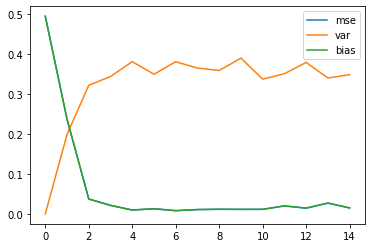

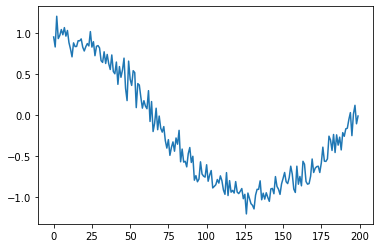

In [57]:
plt.plot(mse_out,label='mse')
plt.plot(variance,label='var')
plt.plot(bias,label='bias')
plt.legend()
plt.show()

plt.plot(y)
plt.show()